In [1]:
pip install pandas yfinance matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


Enter stock ticker (e.g., AAPL, TSLA, P911.DE):  AAPL
Want to explore available data first? (y/n):  N


Financial Analysis for AAPL
RAW FINANCIAL DATA (Most Recent Year):
  Revenue: $416,161,000,000
  Net Income: $112,010,000,000
  Total Equity: $73,733,000,000
  Total Debt: $98,657,000,000
KEY FINANCIAL RATIOS:
  Profit Margin (%): 26.92
  ROE (%): 151.91
  Debt-to-Equity: 1.34
  Current Ratio: 0.89
Generating visualizations...


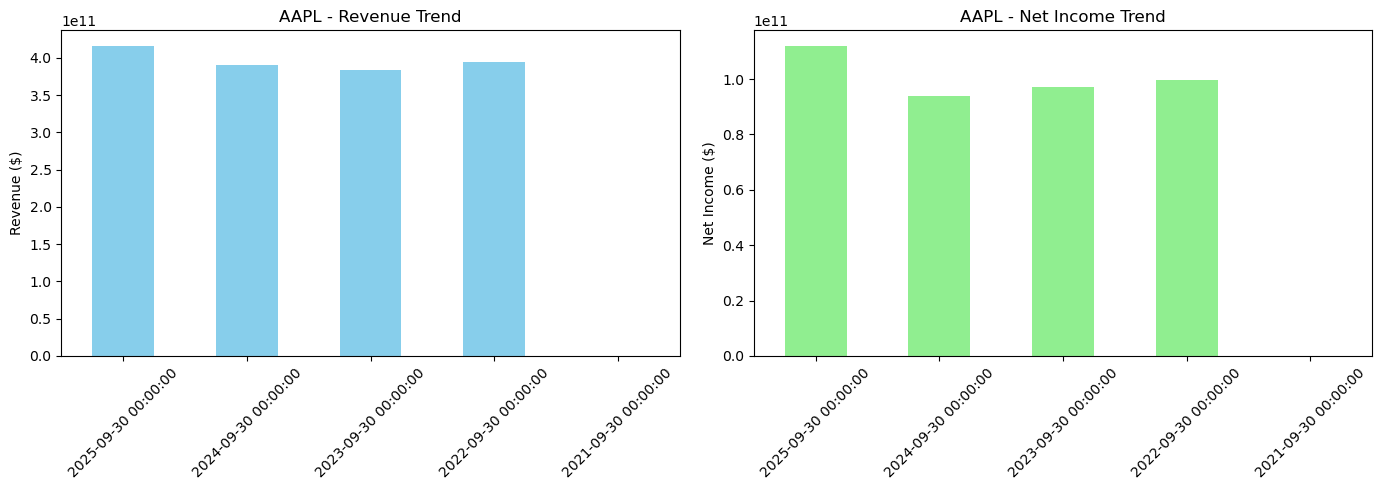

Visualization saved as AAPL_financial_analysis.png

QUICK HEALTH CHECK:
Strong profitability
Potential liquidity concerns
Moderate debt levels


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_financials(ticker):
    """Pull financial statements using yfinance"""
    company = yf.Ticker(ticker)
    income_stmt = company.financials
    balance_sheet = company.balance_sheet
    cash_flow = company.cashflow
    return income_stmt, balance_sheet, cash_flow



def calculate_ratios(ticker):
    """Calculate financial ratios from the statements"""
    company = yf.Ticker(ticker)
    income_stmt = company.financials.iloc[:, 0] 
    balance_sheet = company.balance_sheet.iloc[:, 0]
    
    
    revenue = income_stmt.get('Total Revenue', 0)
    net_income = income_stmt.get('Net Income', 0)
    
    
    total_equity = (balance_sheet.get('Stockholders Equity', 0) or 
                   balance_sheet.get('Total Equity Gross Minority Interest', 0) or
                   balance_sheet.get('Common Stock Equity', 0))
    
    
    total_debt = (balance_sheet.get('Total Debt', 0) or
                 balance_sheet.get('Long Term Debt', 0) + balance_sheet.get('Current Debt', 0))
    
    current_assets = balance_sheet.get('Current Assets', 0)
    current_liabilities = balance_sheet.get('Current Liabilities', 0)
    
   
    profit_margin = (net_income / revenue * 100) if revenue != 0 else 0
    roe = (net_income / total_equity * 100) if total_equity != 0 else 0
    debt_to_equity = (total_debt / total_equity) if total_equity != 0 else 0
    current_ratio = (current_assets / current_liabilities) if current_liabilities != 0 else 0
    
    ratios = {
        'Profit Margin (%)': round(profit_margin, 2),
        'ROE (%)': round(roe, 2),
        'Debt-to-Equity': round(debt_to_equity, 2),
        'Current Ratio': round(current_ratio, 2)
    }
    
    
    raw_data = {
        'Revenue': revenue,
        'Net Income': net_income,
        'Total Equity': total_equity,
        'Total Debt': total_debt
    }
    
    return ratios, raw_data


def visualize_trends(ticker):
    """Create visualizations of financial trends"""
    company = yf.Ticker(ticker)
    income_stmt = company.financials
    
    try:
        revenue = income_stmt.loc['Total Revenue']
        net_income = income_stmt.loc['Net Income']
        
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        
        revenue.plot(kind='bar', ax=ax[0], color='skyblue')
        ax[0].set_title(f'{ticker} - Revenue Trend')
        ax[0].set_ylabel('Revenue ($)')
        ax[0].tick_params(axis='x', rotation=45)
        
        net_income.plot(kind='bar', ax=ax[1], color='lightgreen')
        ax[1].set_title(f'{ticker} - Net Income Trend')
        ax[1].set_ylabel('Net Income ($)')
        ax[1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.savefig(f'{ticker.replace(".", "_")}_financial_analysis.png')
        plt.show()
        
        return True
    except Exception as e:
        print(f"Could not create visualizations: {e}")
        return False

def analyze_company(ticker):
    """Main function - analyzes company and prints report"""
    print(f"Financial Analysis for {ticker}")
    ratios, raw_data = calculate_ratios(ticker)
    
    print("RAW FINANCIAL DATA (Most Recent Year):")
    for key, value in raw_data.items():
        print(f"  {key}: ${value:,.0f}")
    
    print("KEY FINANCIAL RATIOS:")
    for ratio, value in ratios.items():
        print(f"  {ratio}: {value}")
    
    print("Generating visualizations...")
    viz_success = visualize_trends(ticker)
    if viz_success:
        print(f"Visualization saved as {ticker.replace('.', '_')}_financial_analysis.png")
    
    print("\n" + "="*50)
    print("QUICK HEALTH CHECK:")
    if ratios['Profit Margin (%)'] > 10:
        print("Strong profitability")
    elif ratios['Profit Margin (%)'] > 5:
        print("Moderate profitability")
    else:
        print("Low profit margins")
    
    if ratios['Current Ratio'] > 1.5:
        print("Good liquidity position")
    elif ratios['Current Ratio'] > 1.0:
        print("Adequate liquidity")
    else:
        print("Potential liquidity concerns")
    
    if ratios['Debt-to-Equity'] < 1.0:
        print("Conservative debt levels")
    elif ratios['Debt-to-Equity'] < 2.0:
        print("Moderate debt levels")
    else:
        print("High debt levels")


def explore_data(ticker):
    """See what financial data is available for this ticker"""
    company = yf.Ticker(ticker)
    
    print(f"\n{'='*50}")
    print(f"Available Financial Data for {ticker}")
    print(f"{'='*50}\n")
    
    print("INCOME STATEMENT FIELDS:")
    print(company.financials.index.tolist())
    
    print("\n\nBALANCE SHEET FIELDS:")
    print(company.balance_sheet.index.tolist())
    
    print("\n\nCASH FLOW FIELDS:")
    print(company.cashflow.index.tolist())


if __name__ == "__main__":
    ticker = input("Enter stock ticker: ").upper()
    explore_first = input("Want to explore available data first? (y/n): ").lower()
    if explore_first == 'y':
        explore_data(ticker)
        print("\n")
    
    analyze_company(ticker)